In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
bar_s = 0.8
theta_x = 0.1

In [4]:
p_1_dom = np.linspace(0, 1, 100)

In [5]:
def get_benefits(theta_x, bar_s, c):

    #  Close solution
    a_1 = (theta_x /2)
    b_1 = -(theta_x/2 + 1)
    c_1 = 1 - bar_s
    
    p_1 = (- b_1 - np.sqrt(b_1 ** 2 - 4 * a_1 * c_1))/( 2 * a_1)
    
    #  Close solution
    a_0 = ((1 - theta_x) /2)
    b_0 = -((1 - theta_x) / 2 + 1  - p_1 * theta_x)
    c_0 = 1 - p_1 * theta_x - bar_s

    p_0 = (- b_0 - np.sqrt(b_0 ** 2 - 4 * a_0 * c_0))/( 2 * a_0)
        
    # benefits given p_0 and p_1
    pi = ( (theta_x ** 2) * (p_1 ** 2 * (1 - 2 * c) + 2 * p_1 * (1 - p_1) * (1 - c) + (1 - p_1)**2 * 0)
          + 2 * (theta_x) * (1 - theta_x) * (p_0 * p_1 * (1 - 2 * c) + p_1 * (1 - p_0) * (1 - c) + p_0 * (1 - p_1) * (- c) + (1 -p_0) * (1 - p_1) * (0) )
          + (1 - theta_x) ** 2 * (p_0 ** 2 * (1 - 2 * c) + p_1 * (1 - p_0) * (1 - c) + p_0 * (1 - p_1) * (- c) + (1 -p_0) * (1 - p_1) * (0) )
         )

    return pi

In [6]:
def optimal_signa(theta_x, c):
    result = optimize.minimize(
        lambda signal: -get_benefits(theta_x, signal, c),
        0,
        method='Nelder-Mead',
        bounds = [(0, 1)],
        options={
            'maxiter': 1000,    # Maximum number of iterations
            'disp': False,       # Display progress
            'adaptive': True    # Use adaptive parameters
        }
    )
    return result.x [0]   

In [7]:
from scipy import optimize

In [8]:
theta_x_grid = np.linspace(0,1,100)
c_grid = np.linspace(0,1,100)

In [9]:
import pandas as pd

In [10]:
df = {}

for theta_x in theta_x_grid:
    for c in c_grid:
        df[(theta_x, c)] = optimal_signa(theta_x, c)

/tmp/ipykernel_3501/305754372.py:8: RuntimeWarning: invalid value encountered in divide
  p_1 = (- b_1 - np.sqrt(b_1 ** 2 - 4 * a_1 * c_1))/( 2 * a_1)
/tmp/ipykernel_3501/305754372.py:15: RuntimeWarning: invalid value encountered in divide
  p_0 = (- b_0 - np.sqrt(b_0 ** 2 - 4 * a_0 * c_0))/( 2 * a_0)


In [11]:
df = pd.DataFrame(df.values(), index = df.keys())

In [12]:
df.index.names = ["theta_x", "c"]

In [13]:
import seaborn as sns

<Axes: xlabel='c', ylabel='theta_x'>

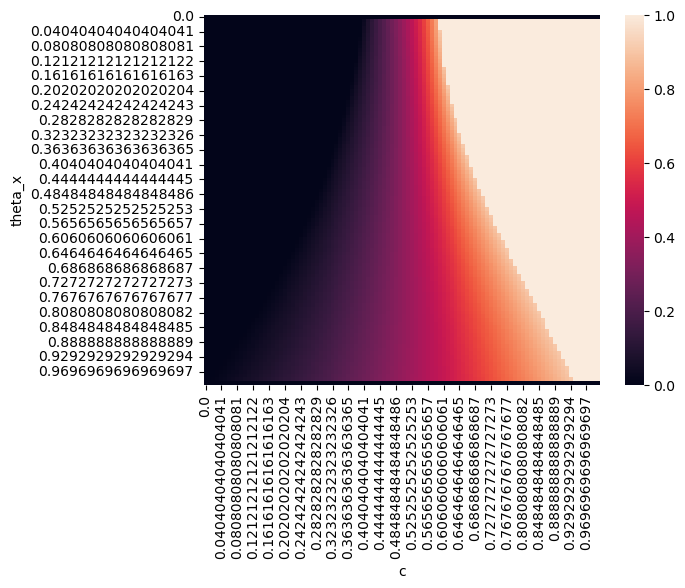

In [14]:
sns.heatmap(df[0].unstack())